In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import json
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [15]:

def getBrowserArrayTimes():
    browserTimesArray = []
    for i in range(1, 11):
        file_path = './data/resnet_browser/resnet-wasm-browser (' + str(i) + ').json'
    
        with open(file_path) as file:
            data = json.load(file)
        
        RWB_Times = pd.DataFrame(data)
        #print(RWB_Times)
        #RWB_Times_s = RWB_Times / 1000
        browserTimesArray.append(RWB_Times)
    
    return browserTimesArray

def getHeadlessArrayTimes():
    headlessTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet_headless/resnet-wasm-headless' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        RWB_Times = pd.DataFrame(data)
        #RWB_Times_s = RWB_Times / 1000.0
        headlessTimesArray.append(RWB_Times)
    return headlessTimesArray

def getPythonArrayTimes():
    pythonTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet_python/resnet-python' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        print(type(data))
        print(data)
        RWB_Times = pd.DataFrame(eval(data))
        RWB_Times_s = RWB_Times
        pythonTimesArray.append(RWB_Times_s)
    return pythonTimesArray

def get_combine_memory_columns(arr1, arr2, arr3):
    # Check if all arrays have the same length
    if not (len(arr1) == len(arr2) == len(arr3)):
        return "Error: The arrays do not contain the same number of dataframes."

    combined_memory_dfs = []

    for i in range(len(arr1)):
        memory_df = pd.DataFrame()
        memory_df['memory_browser'] = arr1[i]['memory']
        memory_df['memory_headless'] = arr2[i]['memory']
        memory_df['memory_python'] = arr3[i]['memory']

        combined_memory_dfs.append(memory_df)

    return combined_memory_dfs

In [16]:
def plotDatasetTimes(df,xlabel,ylabel,title):
    
    labels = df[0].columns.values
    #print(labels)
    avarages = []
    errors = []
    c=['black', 'blue', 'red', 'green', 'purple']

    for label in labels:
        if label != 'memory':
            average = np.mean([df[label] for df in df], axis=0)
            avarages.append(average)
            error = np.std([df[label] for df in df], axis=0)
            errors.append(error)

    x = range(1, len(avarages[0]) + 1)
    # Plot all columns
    plt.figure(figsize=(10, 6))
    i = 0
    for column in df[0].columns:
        if column != 'memory':
            plt.errorbar(x, avarages[i], yerr=errors[i], fmt='o', capsize=5, mfc=c[i], mec=c[i], ecolor=c[i])
            # Connect the points with a line
            plt.plot(x, avarages[i], label=column, color=c[i])
            i += 1

    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.title(title, fontsize=17)
    plt.legend()
    plt.grid(True)
    # Set y-axis limits
    #plt.ylim(0, 60)
    # Ensure only integers are used as x-axis labels
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    save_name = title.replace(" ", "_")+".pdf"
    #plt.savefig(save_name, format="pdf")
    plt.show()

def plotDatasetMemory(df,xlabel,ylabel,title):
    
    labels = df[0].columns.values
    #print(labels)
    avarages = []
    errors = []
    c=['y', 'b', 'r']

    for label in labels:
        average = np.mean([df[label] for df in df], axis=0)
        avarages.append((average / 1024) / 1024)
        error = np.std([df[label] for df in df], axis=0)
        errors.append((error / 1024) / 1024)

    x = range(1, len(avarages[0]) + 1)
    # Plot all columns
    plt.figure(figsize=(10, 6))
    i = 0
    for column in df[0].columns:
        plt.errorbar(x, avarages[i], yerr=errors[i], fmt='o', capsize=5, mfc=c[i], mec=c[i], ecolor=c[i])
        # Connect the points with a line
        plt.plot(x, avarages[i], label=column, color=c[i])
        i += 1

    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.title(title, fontsize=17)
    plt.legend()
    plt.grid(True)
    # Set y-axis limits
    #plt.ylim(0, 60)
    # Ensure only integers are used as x-axis labels
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    save_name = title.replace(" ", "_")+".pdf"
    #plt.savefig(save_name, format="pdf")
    plt.show()
    


In [17]:
def plotVS(df1,df2,xlabel,ylabel,linea1,linea2):
    # Plot model vs model
    labels = df1[0].columns.values
    print(labels)
    avarages1 = []
    errors1 = []
    avarages2 = []
    errors2 = []
    c=['k','b','r','g']
    for label in labels:
        average = np.mean([df[label] for df in df1], axis=0)
        avarages1.append(average)
        error = np.std([df[label] for df in df1], axis=0)
        errors1.append(error)
        average = np.mean([df[label] for df in df2], axis=0)
        avarages2.append(average)
        error = np.std([df[label] for df in df2], axis=0)
        errors2.append(error)
            
    x = range(1, len(avarages1[0]) + 1)
    for i in range (len(avarages1)):
        plt.figure(figsize=(10, 6))
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        if labels[i] != 'memory':
            plt.plot(x, avarages1[i], linea1, label=xlabel)
            plt.plot(x, avarages2[i], linea2, label=ylabel)
            plt.ylabel("Seconds")
            title=xlabel + " VS " + ylabel + " " + labels[i] + " calculation times (S)"
            plt.title(title, fontsize=20)
        else:
            plt.plot(x, ((avarages1[i] / 1024) /1024), linea1, label=xlabel)
            plt.plot(x, ((avarages2[i] / 1024) /1024), linea2, label=ylabel)
            plt.ylabel("Megabytes", fontsize=13)
            title = xlabel + " VS " + ylabel + " " + labels[i] + " memory usage (MB)"
            plt.title(title, fontsize=17)

        plt.xlabel("Number of images", fontsize=13)
        
        plt.legend()
        plt.grid(True)
        save_name = title.replace(" ", "_")+".pdf"
        #plt.savefig(save_name, format="pdf")
        plt.show()
        
        

In [18]:
def calculate_improvement_and_speedup(df_set1, df_set2):
    if len(df_set1) != len(df_set2):
        return "Error: The two sets contain a different number of dataframes."

    improvement_results = []

    for df1, df2 in zip(df_set1, df_set2):
        improvement_df = pd.DataFrame()

        for column in df1.columns:
            if column != 'images':
                improvement = ((df2[column] - df1[column]) / df1[column]) * 100
                improvement_df[column] = improvement

        average_improvements = improvement_df.mean()
        improvement_results.append(average_improvements)

    # Creating a DataFrame to display the results more clearly
    final_results_df = pd.DataFrame(improvement_results)
    #print(final_results_df)
    return final_results_df.mean().to_frame(name='Average Improvement (%)')

# Usage example:
# Assuming df_set1 and df_set2 are the two arrays of dataframes you mentioned
# final_improvement = calculate_improvement_and_speedup(df_set1, df_set2)
# print(final_improvement)


In [19]:
browserTimesArray = getBrowserArrayTimes()
headlessTimesArray = getHeadlessArrayTimes()
pythonTimesArray = getPythonArrayTimes()


#browserTimesArray = [make_positive(df) for df in browserTimesArray]

<class 'str'>
[{"images": 0.0, "memory": 602112, "tensor": 0.307786226272583, "model": 0.925706148147583, "total": 1.233492374420166}, {"images": 0.0, "memory": 1204224, "tensor": 0.4770050048828125, "model": 0.7829790115356445, "total": 1.2609848976135254}, {"images": 0.0, "memory": 1806336, "tensor": 0.6430213451385498, "model": 0.9056189060211182, "total": 1.548640251159668}, {"images": 0.0, "memory": 2408448, "tensor": 0.8089642524719238, "model": 0.9931519031524658, "total": 1.8021161556243896}, {"images": 0.0, "memory": 3010560, "tensor": 0.9359405040740967, "model": 1.0296452045440674, "total": 1.9665968418121338}, {"images": 0.0, "memory": 3612672, "tensor": 1.1039612293243408, "model": 1.1695187091827393, "total": 2.27347993850708}, {"images": 0.0, "memory": 4214784, "tensor": 1.2839953899383545, "model": 1.2415618896484375, "total": 2.525557279586792}, {"images": 0.0, "memory": 4816896, "tensor": 1.4503138065338135, "model": 1.2560598850250244, "total": 2.706373691558838}, {"

In [20]:
def clean_outliers(data, cutoff=2):
    median = np.median(data)
    std = np.std(data)
    mean = np.mean(data)
    z_scores = np.array([(x - mean) / std for x in data])
    filtered_values = np.where(np.abs(z_scores) > cutoff, median, data)
    return filtered_values

def clean_dataframes(array_of_dataframes, cutoff=2):
    for df in array_of_dataframes:
        for column in df.columns:
            if column != 'memory':  # Skip the 'memory' column
                df[column] = clean_outliers(df[column].values, cutoff)
    return array_of_dataframes

In [21]:
cleaned_browserTimesArray = clean_dataframes(browserTimesArray)
#cleaned_headlessTimesArray = clean_dataframes(headlessTimesArray)
#cleaned_pythonTimesArray = clean_dataframes(pythonTimesArray)
memoryArray = get_combine_memory_columns(cleaned_browserTimesArray,headlessTimesArray,pythonTimesArray)

C:\Users\Tomas\AppData\Local\Temp\ipykernel_24312\3399663750.py:5: RuntimeWarning: invalid value encountered in scalar divide
  z_scores = np.array([(x - mean) / std for x in data])


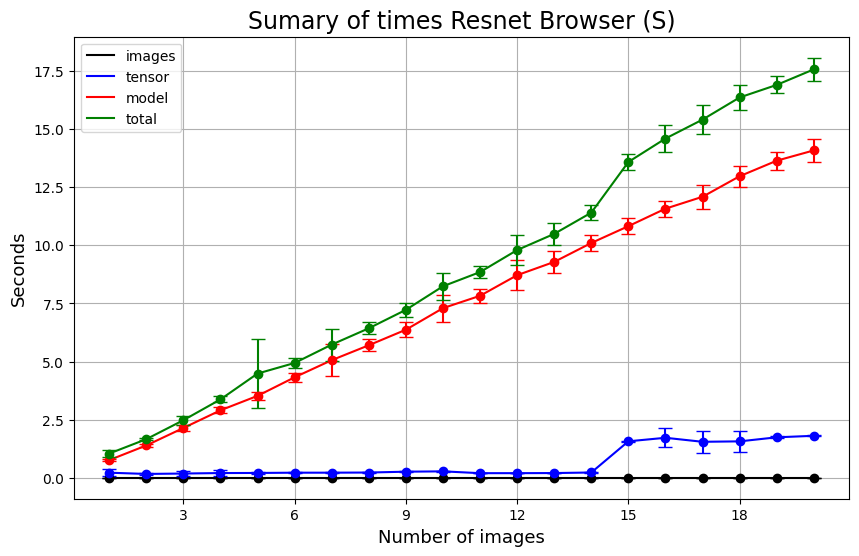

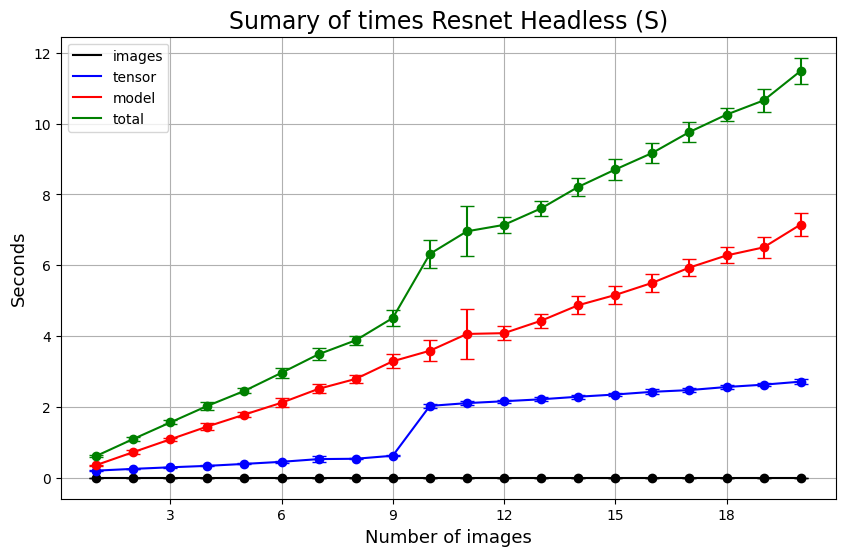

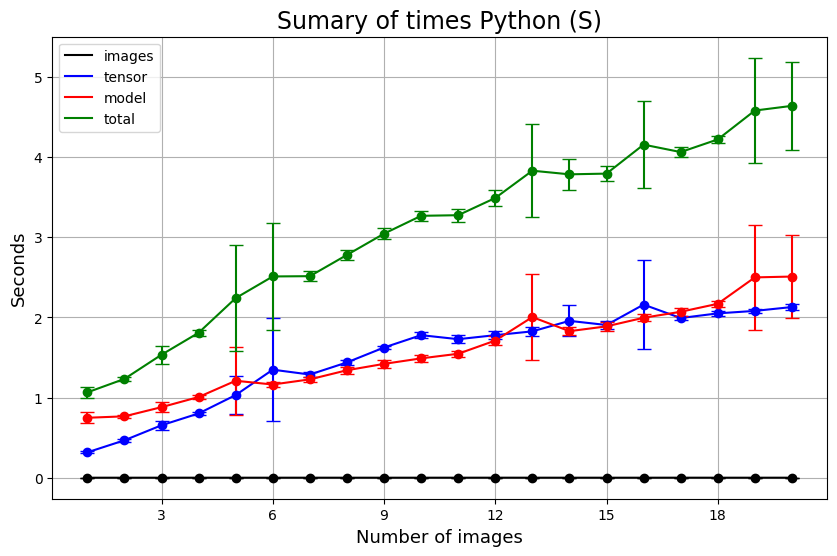

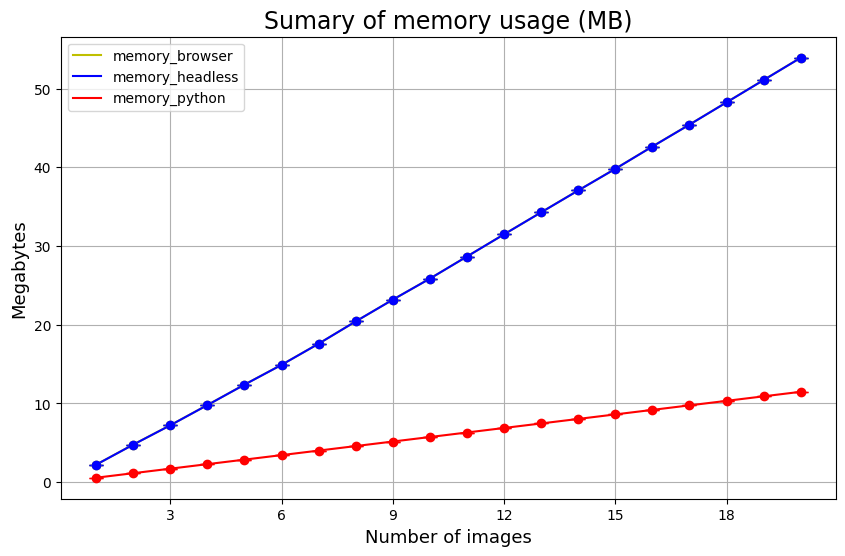

In [22]:
plotDatasetTimes(cleaned_browserTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Browser (S)")
plotDatasetTimes(headlessTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Headless (S)")
plotDatasetTimes(pythonTimesArray,"Number of images", "Seconds", "Sumary of times Python (S)")
plotDatasetMemory(memoryArray,"Number of images", "Megabytes", "Sumary of memory usage (MB)")

['images' 'memory' 'tensor' 'model' 'total']


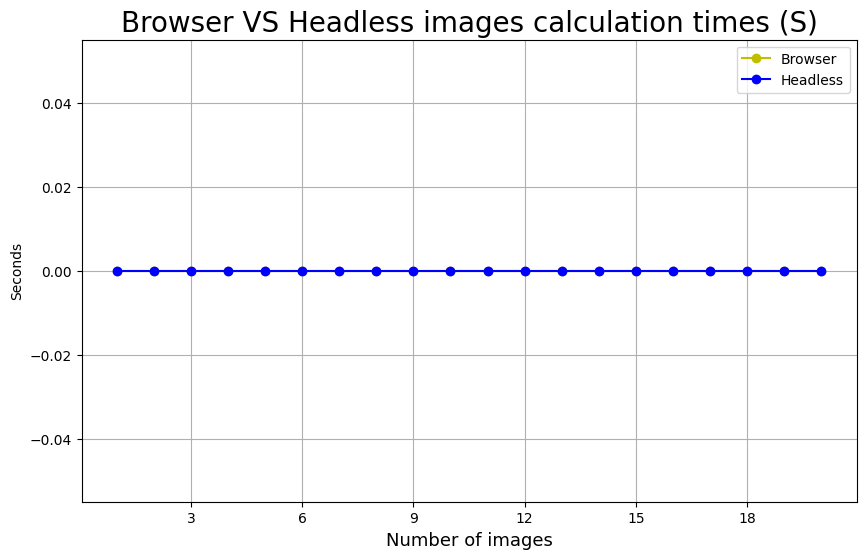

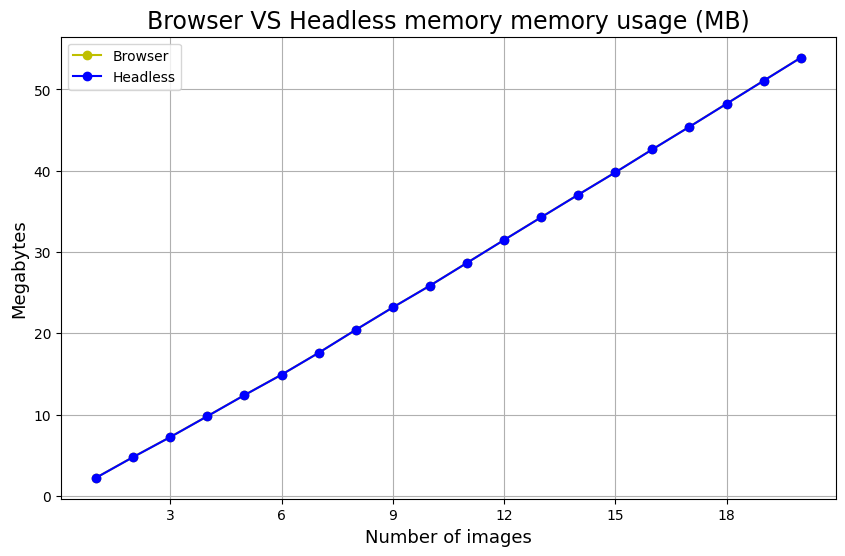

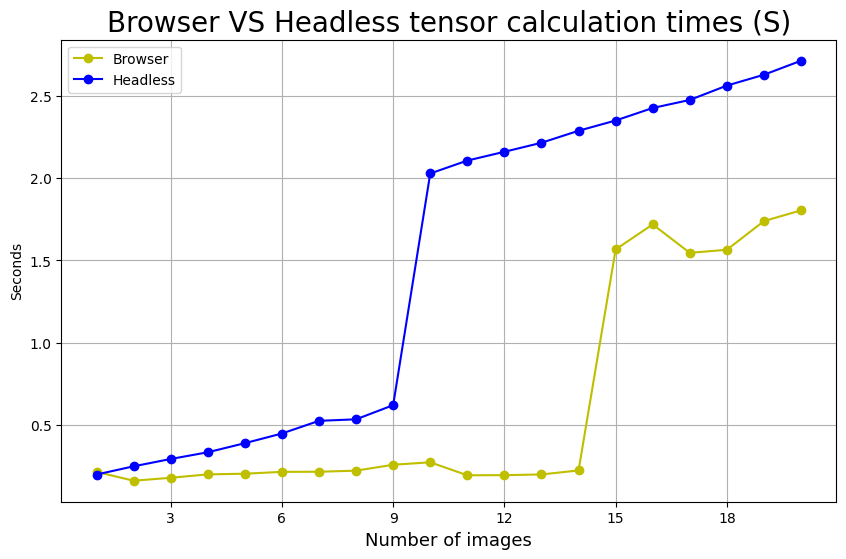

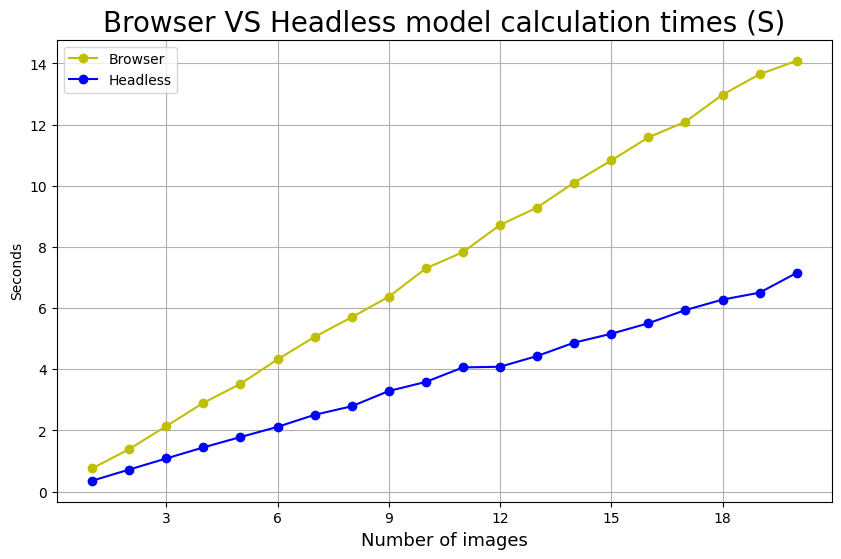

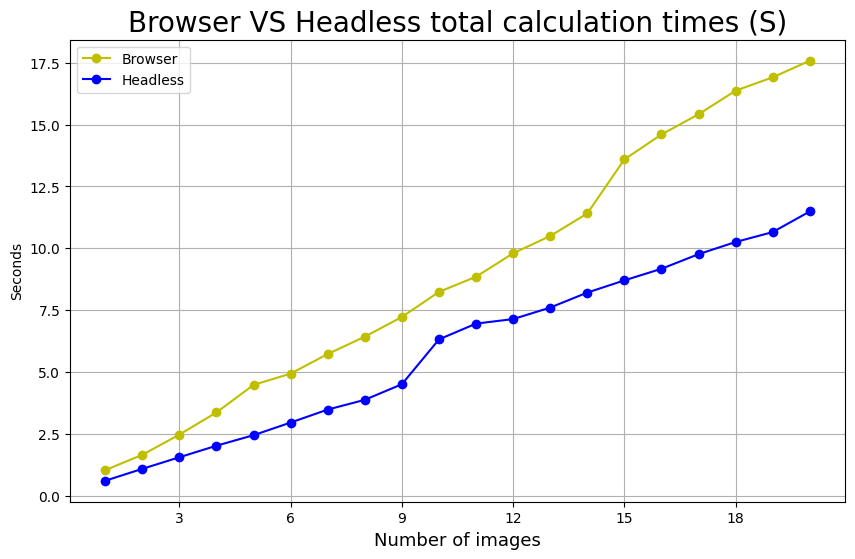

In [23]:
linea_python = 'ro-'
linea_browser = 'yo-'
linea_headless = 'bo-'

plotVS(cleaned_browserTimesArray,headlessTimesArray,"Browser","Headless",linea_browser,linea_headless)

['images' 'memory' 'tensor' 'model' 'total']


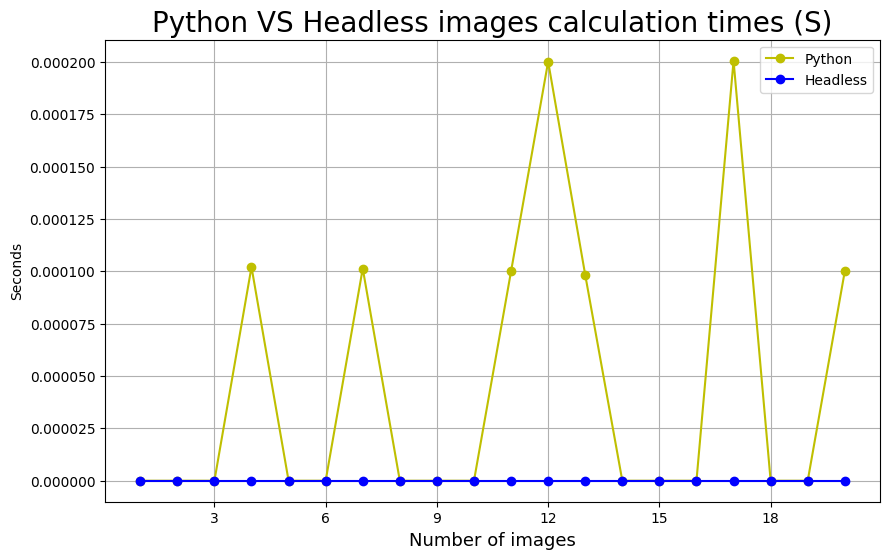

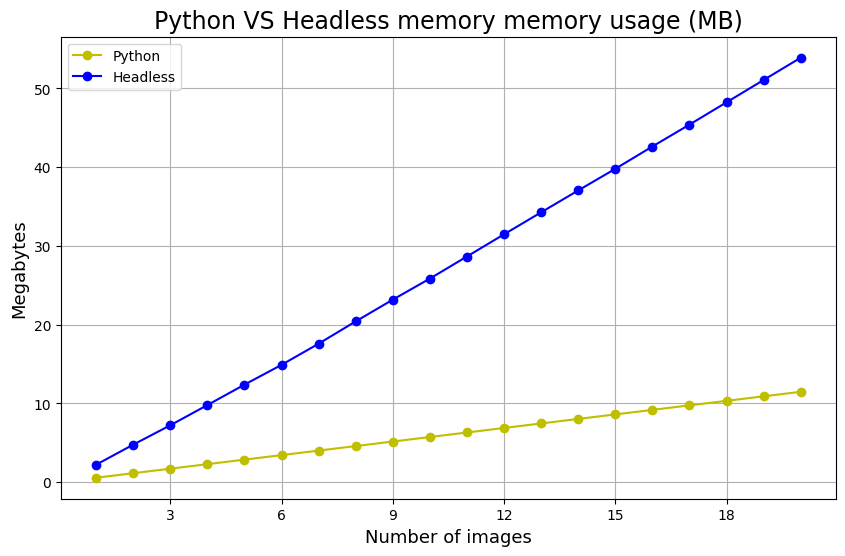

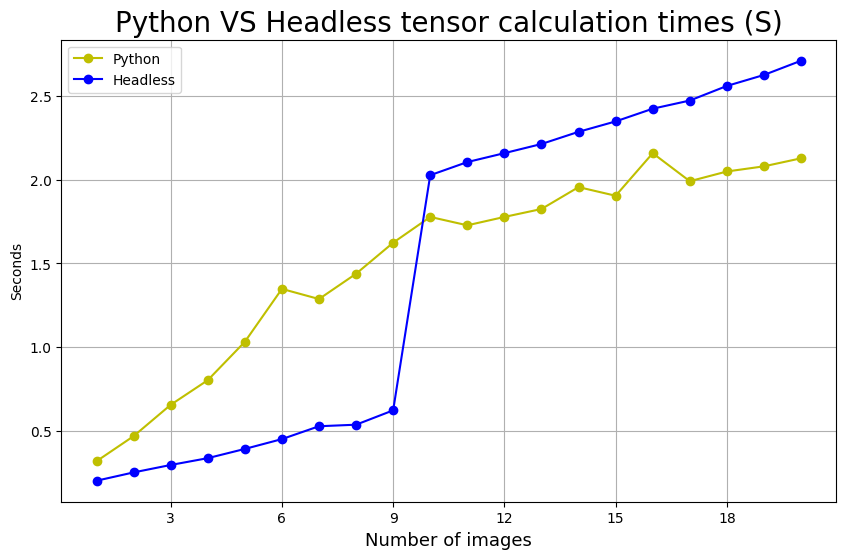

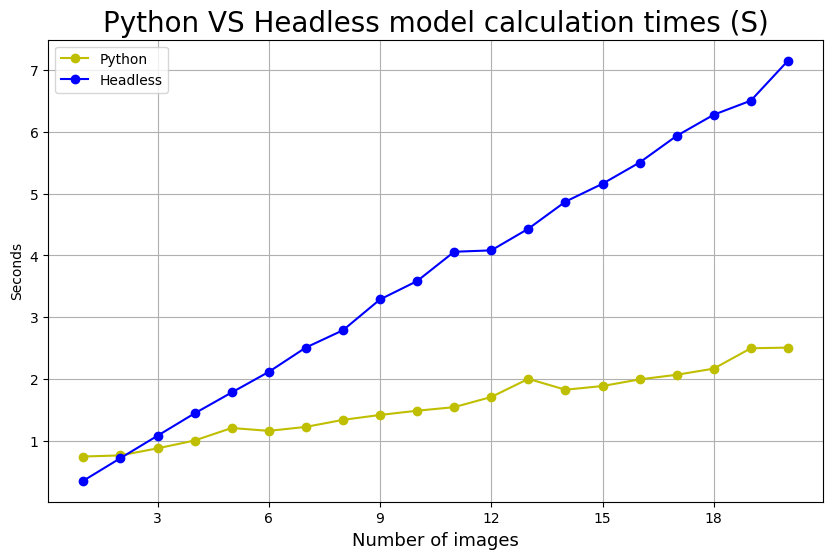

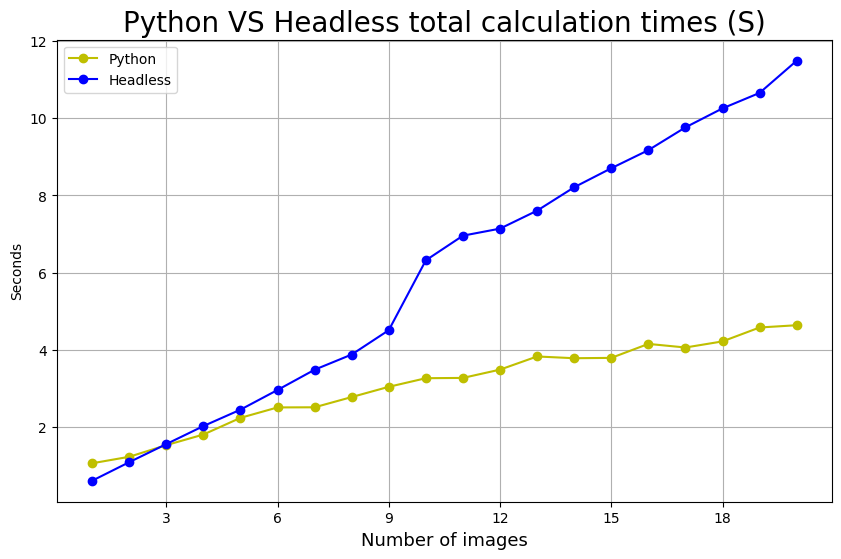

In [24]:
plotVS(pythonTimesArray,headlessTimesArray,"Python","Headless",linea_browser,linea_headless)

['images' 'memory' 'tensor' 'model' 'total']


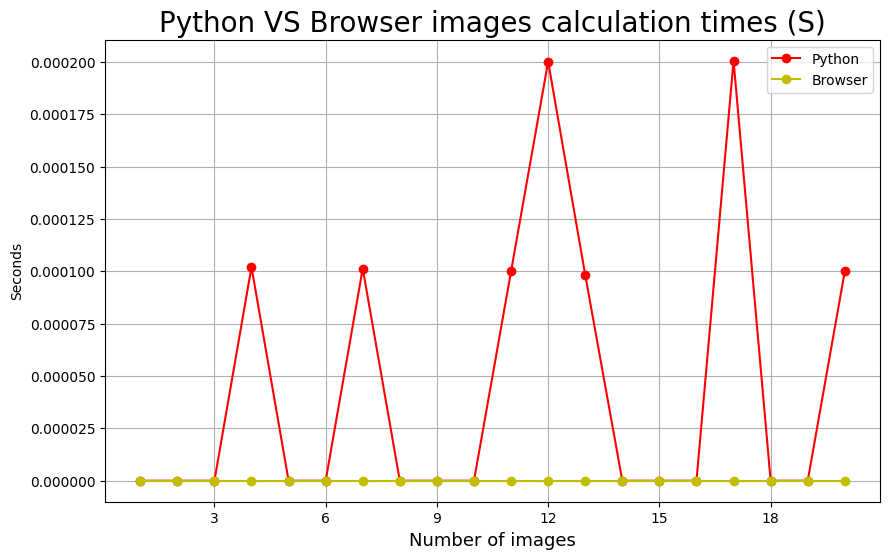

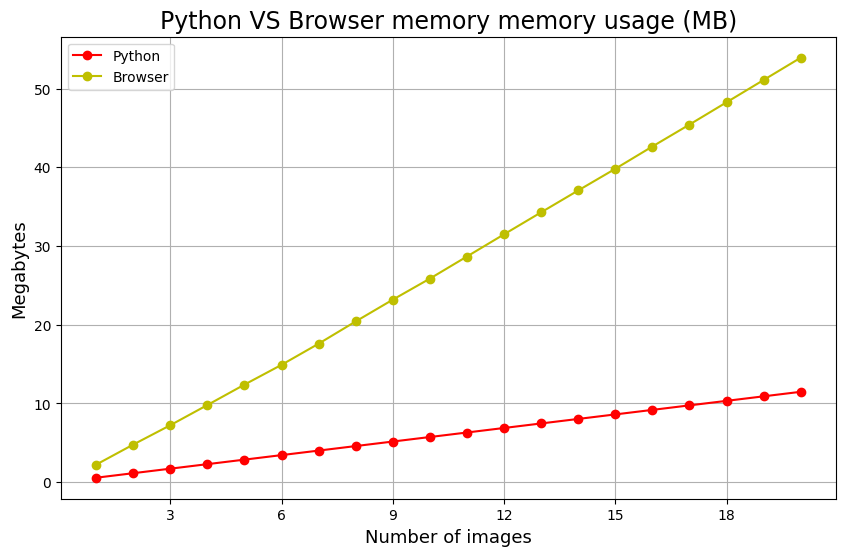

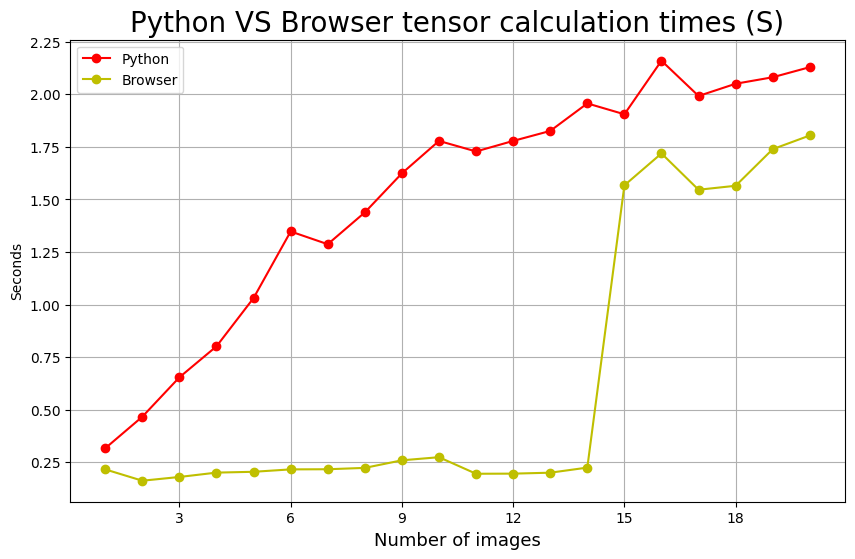

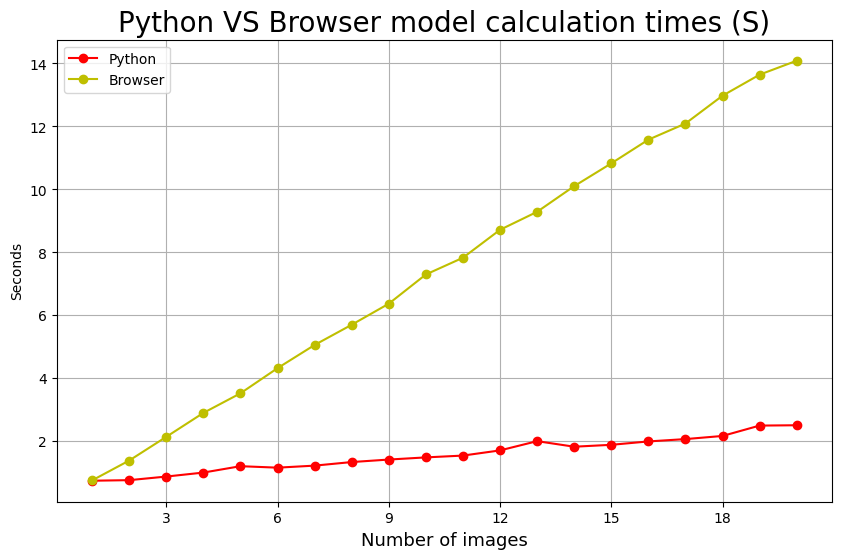

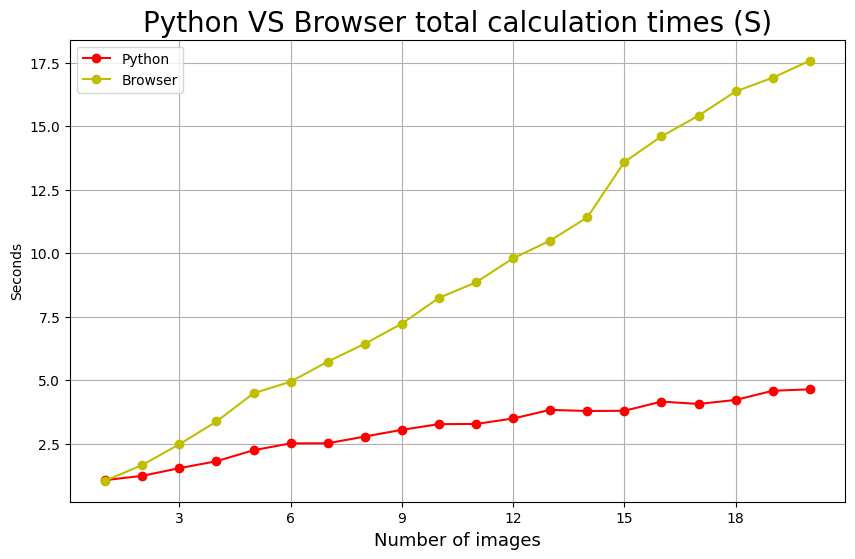

In [25]:
plotVS(pythonTimesArray,cleaned_browserTimesArray,"Python","Browser",linea_python,linea_browser)

In [26]:
final_improvement_BrHe = calculate_improvement_and_speedup(cleaned_browserTimesArray,headlessTimesArray)
final_improvement_PyBr = calculate_improvement_and_speedup(pythonTimesArray,cleaned_browserTimesArray)
final_improvement_PyHe = calculate_improvement_and_speedup(pythonTimesArray,headlessTimesArray,)
print(final_improvement_BrHe)
print(final_improvement_PyBr)
print(final_improvement_PyHe)

        Average Improvement (%)
memory                -0.046557
tensor               296.183650
model                -50.680360
total                -34.659988
        Average Improvement (%)
memory               346.268817
tensor               -60.398694
model                340.973861
total                166.057585
        Average Improvement (%)
memory               346.074310
tensor               -13.150275
model                116.341770
total                 73.984360
